In [58]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import IsolationForest
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import logging

In [22]:
# Set visualization style
sns.set(style='whitegrid')

In [80]:
def load_data(train_path, test_path, store_path):
    train = pd.read_csv(train_path)
    test = pd.read_csv(test_path)
    store = pd.read_csv(store_path)
    return train, test, store

# Load the data
train, test, store = load_data('../Data/train.csv', '../Data/test.csv', '../Data/store.csv')

# Display the first few rows of each dataset
print("Train Dataset:")
display(train.head())

print("Test Dataset:")
display(test.head())

print("Store Dataset:")
display(store.head())

C:\Users\Tesfaye\AppData\Local\Temp\ipykernel_3212\884786577.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv(train_path)


Train Dataset:


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


Test Dataset:


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


Store Dataset:


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [25]:
# Display the first few rows
print("Data Overview For Train:")
print(train.head())

# Summary statistics
print("\nSummary Statistics For Train:")
print(train.describe())

# Check for missing values
print("\nMissing Values For Train:")
print(train.isnull().sum())



Data Overview For Train:
   Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1  

Summary Statistics For Train:
              Store     DayOfWeek         Sales     Customers          Open  \
count  1.017209e+06  1.017209e+06  1.017209e+06  1.017209e+06  1.017209e+06   
mean   5.584297e+02  3.998341e+00  5.773819e+03  6.331459e+02  8.301067e-01   
std    3.219087e+02  1.997391e+00  3.849926e+03  4.644117e+02  3.755392e-01   
min    1.000000e+00  1.000000e+00  0.00

In [26]:
# Display the first few rows
print("Data Overview For Test:")
print(test.head())

# Summary statistics
print("\nSummary Statistics For Test:")
print(test.describe())

# Check for missing values
print("\nMissing Values For Test:")
print(test.isnull().sum())





Data Overview For Test:
   Id  Store  DayOfWeek        Date  Open  Promo StateHoliday  SchoolHoliday
0   1      1          4  2015-09-17   1.0      1            0              0
1   2      3          4  2015-09-17   1.0      1            0              0
2   3      7          4  2015-09-17   1.0      1            0              0
3   4      8          4  2015-09-17   1.0      1            0              0
4   5      9          4  2015-09-17   1.0      1            0              0

Summary Statistics For Test:
                 Id         Store     DayOfWeek          Open         Promo  \
count  41088.000000  41088.000000  41088.000000  41077.000000  41088.000000   
mean   20544.500000    555.899533      3.979167      0.854322      0.395833   
std    11861.228267    320.274496      2.015481      0.352787      0.489035   
min        1.000000      1.000000      1.000000      0.000000      0.000000   
25%    10272.750000    279.750000      2.000000      1.000000      0.000000   
50%    205

In [27]:
# Display the first few rows
print("Data Overview For store:")
print(store.head())

# Summary statistics
print("\nSummary Statistics For store:")
print(store.describe())

# Check for missing values
print("\nMissing Values For store:")
print(store.isnull().sum())

Data Overview For store:
   Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4         c          c                620.0                        9.0   
4      5         a          a              29910.0                        4.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
1                    2007.0       1             13.0           2010.0   
2                    2006.0       1             14.0           2011.0   
3                    2009.0       0              NaN              NaN   
4                    2015.0       0              NaN              NaN   

     PromoInterval  
0              NaN  
1  Jan,

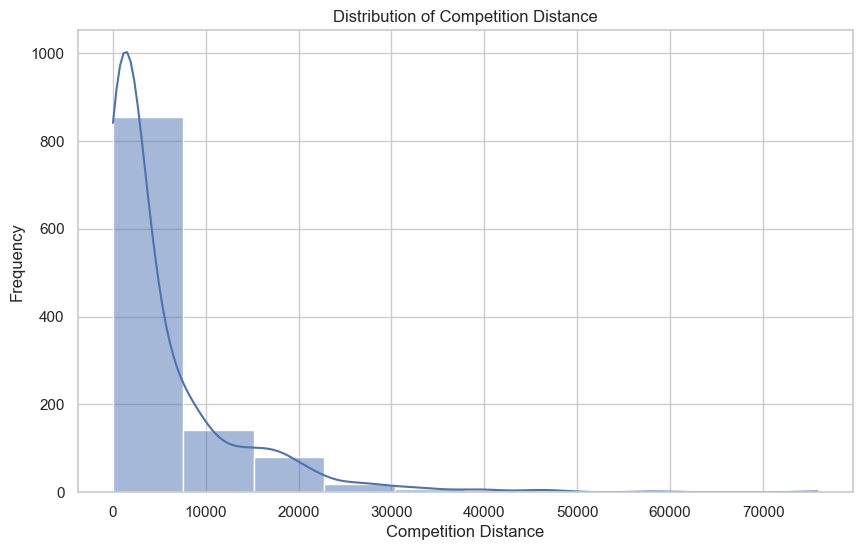

In [29]:
# Distribution of CompetitionDistance
plt.figure(figsize=(10, 6))
sns.histplot(store['CompetitionDistance'].dropna(), bins=10, kde=True)
plt.title('Distribution of Competition Distance')
plt.xlabel('Competition Distance')
plt.ylabel('Frequency')
plt.show()

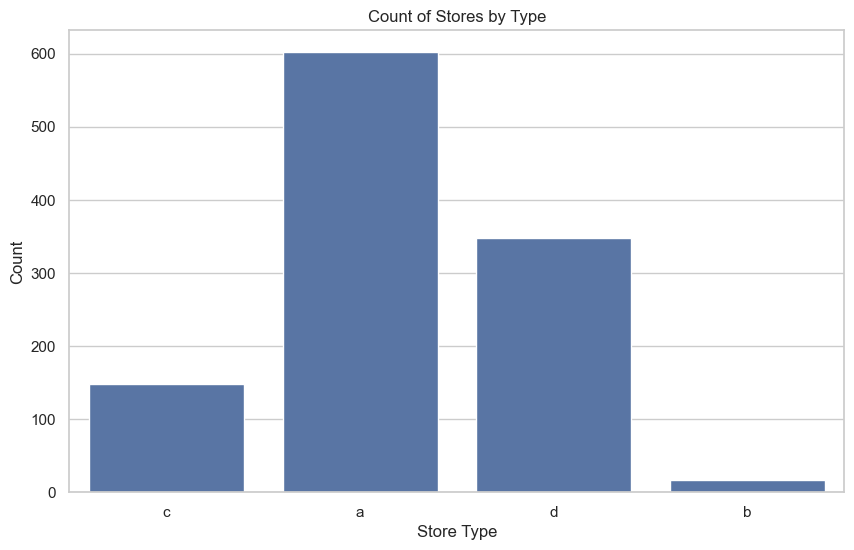

In [31]:
 # Countplot for StoreType
plt.figure(figsize=(10, 6))
sns.countplot(data=store, x='StoreType')
plt.title('Count of Stores by Type')
plt.xlabel('Store Type')
plt.ylabel('Count')
plt.show()

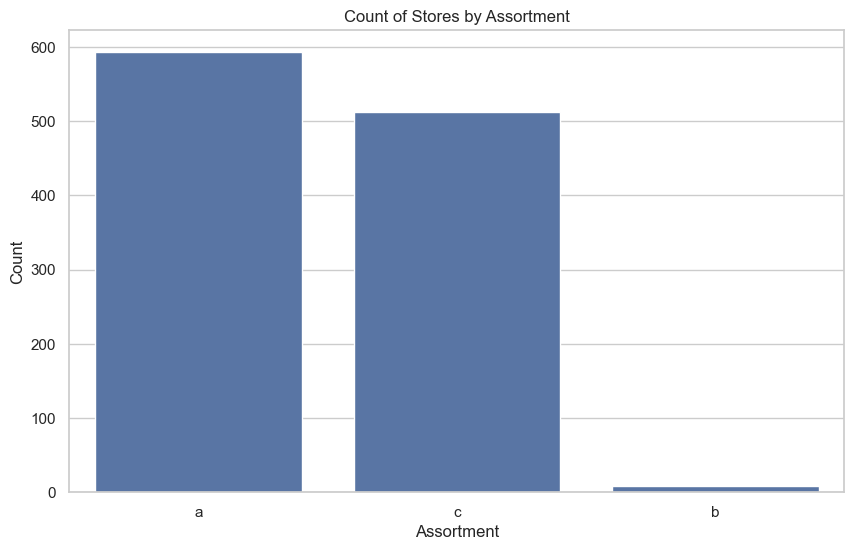

In [32]:
# Countplot for Assortment
plt.figure(figsize=(10, 6))
sns.countplot(data=store, x='Assortment')
plt.title('Count of Stores by Assortment')
plt.xlabel('Assortment')
plt.ylabel('Count')
plt.show()

Non-numeric columns:
Index(['StoreType', 'Assortment', 'PromoInterval'], dtype='object')


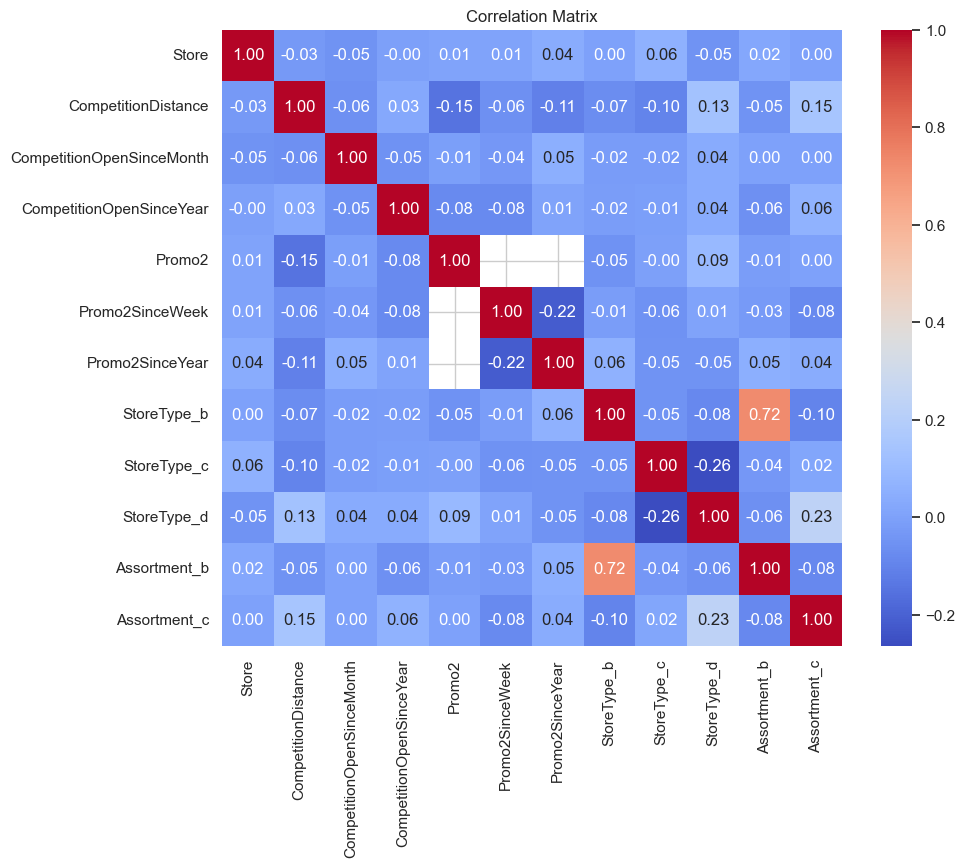

In [35]:
# Identify non-numeric columns
print("Non-numeric columns:")
print(store.select_dtypes(include=['object']).columns)

# Convert categorical columns to numeric (one-hot encoding), excluding non-numeric ones
df_encoded = pd.get_dummies(store.drop(columns=['PromoInterval']), columns=['StoreType', 'Assortment'], drop_first=True)

# Now calculate the correlation matrix
corr = df_encoded.corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

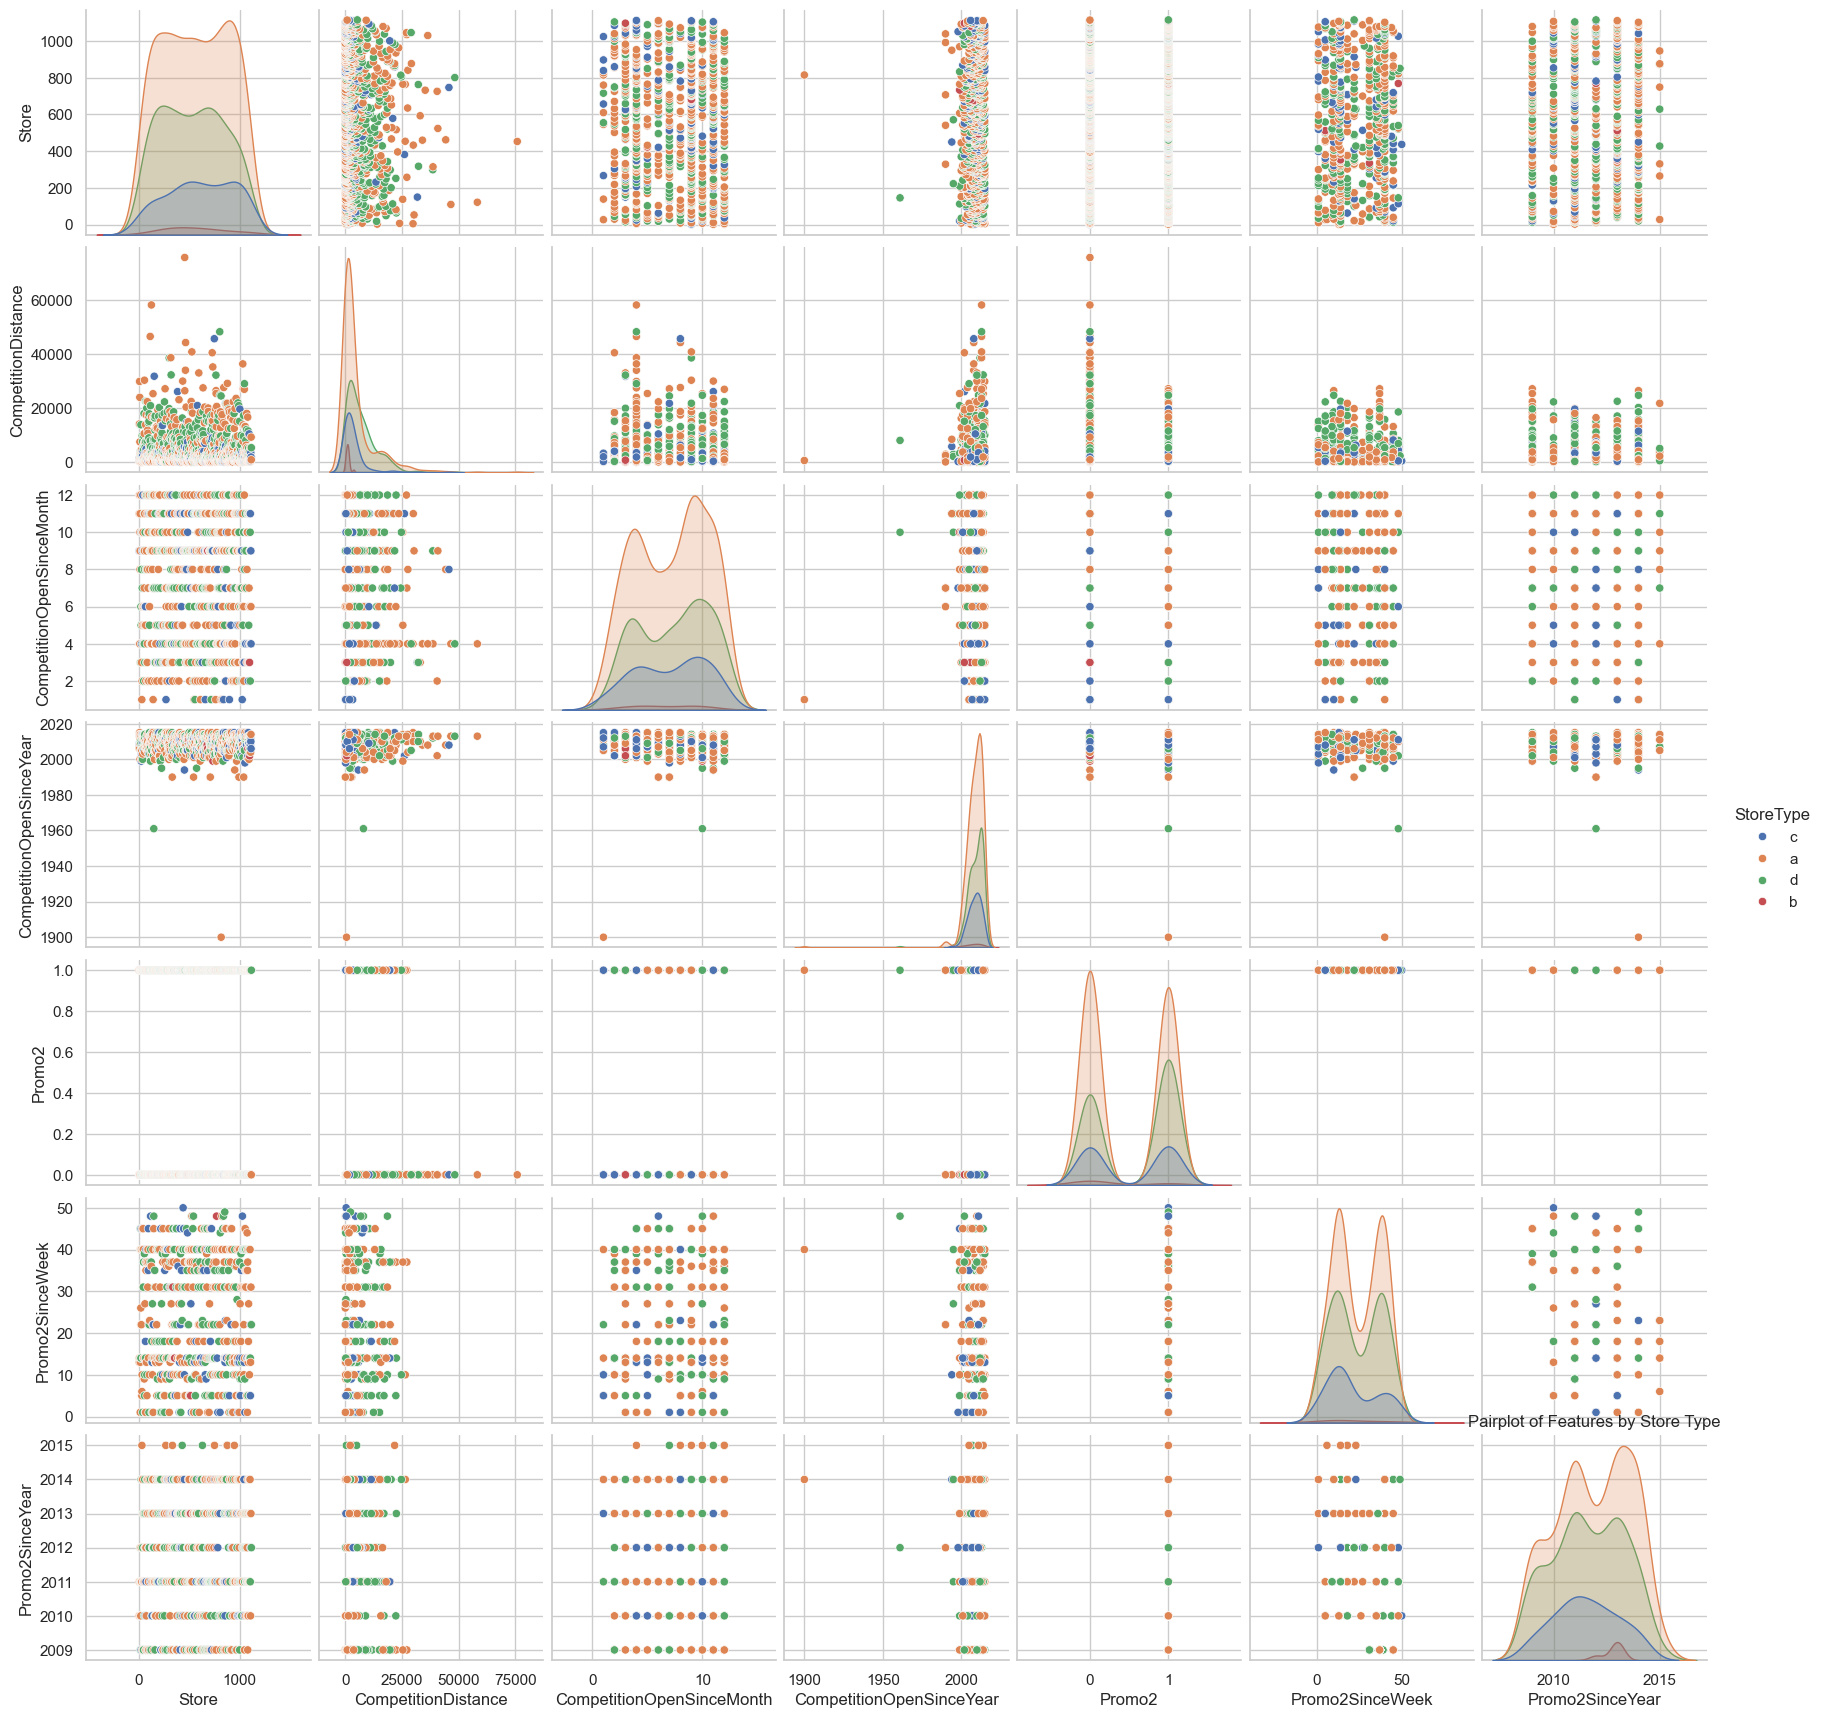

In [36]:
# Pairplot for selected features
sns.pairplot(store, hue='StoreType')
plt.title('Pairplot of Features by Store Type')
plt.show()

In [41]:
# Function to handle missing values
def handle_missing_values(store):
    for column in store.columns:
        if store[column].isnull().sum() > 0:  # Check if the column has missing values
            if store[column].dtype in ['int64', 'float64']:  # Numerical columns
                # Impute with mean or median based on skewness
                if store[column].skew() > 1:  # Right skewed
                    store[column].fillna(store[column].median(), inplace=True)
                else:  # Symmetrical or left skewed
                    store[column].fillna(store[column].mean(), inplace=True)
            elif store[column].dtype == 'object':  # Categorical columns
                # Impute with mode
                store[column].fillna(store[column].mode()[0], inplace=True)
                
    return store

# Apply the function to handle missing values
df_cleaned = handle_missing_values(store)
df_cleaned.head()

C:\Users\Tesfaye\AppData\Local\Temp\ipykernel_3212\3349630103.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  store[column].fillna(store[column].mean(), inplace=True)
C:\Users\Tesfaye\AppData\Local\Temp\ipykernel_3212\3349630103.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,23.595447,2011.763573,"Jan,Apr,Jul,Oct"
1,2,a,a,570.0,11.0,2007.0,1,13.000000,2010.000000,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.000000,2011.000000,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,23.595447,2011.763573,"Jan,Apr,Jul,Oct"
4,5,a,a,29910.0,4.0,2015.0,0,23.595447,2011.763573,"Jan,Apr,Jul,Oct"


###Handling outliers

In [50]:
# Function to identify and handle outliers for all numeric columns
def handle_outliers(df_cleaned):
    for column in df_cleaned.select_dtypes(include=['int64', 'float64']).columns:
        # Calculate the first and third quartiles (Q1 and Q3)
        Q1 = df_cleaned[column].quantile(0.25)
        Q3 = df_cleaned[column].quantile(0.75)
        IQR = Q3 - Q1  # Interquartile Range
        
        # Define bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Identify outliers
        outliers = df_cleaned[(df_cleaned[column] < lower_bound) | (df_cleaned[column] > upper_bound)]
        print(f"\nOutliers in {column}:")
        print(outliers)
        
        # Capping/flooring outliers
        df_cleaned[column] = np.where(df_cleaned[column] < lower_bound, lower_bound, df_cleaned[column])
        df_cleaned[column] = np.where(df_cleaned[column] > upper_bound, upper_bound, df_cleaned[column])
    
    return df_cleaned
df_cleaned = handle_outliers(df_cleaned.copy())
df_cleaned.head()


Outliers in Store:
Empty DataFrame
Columns: [Store, StoreType, Assortment, CompetitionDistance, CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2, Promo2SinceWeek, Promo2SinceYear, PromoInterval]
Index: []

Outliers in CompetitionDistance:
       Store StoreType Assortment  CompetitionDistance  \
4        5.0         a          a              29910.0   
6        7.0         a          c              24000.0   
48      49.0         d          c              18010.0   
52      53.0         a          c              30360.0   
63      64.0         d          c              22560.0   
...      ...       ...        ...                  ...   
1037  1038.0         d          a              17290.0   
1044  1045.0         a          c              26990.0   
1045  1046.0         d          c              29070.0   
1068  1069.0         a          c              18050.0   
1078  1079.0         a          a              16680.0   

      CompetitionOpenSinceMonth  CompetitionOpenSinc

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1.0,c,a,1270.0,9.0,2008.0,0.0,23.595447,2011.763573,"Jan,Apr,Jul,Oct"
1,2.0,a,a,570.0,11.0,2007.0,1.0,19.606830,2011.408932,"Jan,Apr,Jul,Oct"
2,3.0,a,a,14130.0,12.0,2006.0,1.0,19.606830,2011.408932,"Jan,Apr,Jul,Oct"
3,4.0,c,c,620.0,9.0,2009.0,0.0,23.595447,2011.763573,"Jan,Apr,Jul,Oct"
4,5.0,a,a,16107.5,4.0,2015.0,0.0,23.595447,2011.763573,"Jan,Apr,Jul,Oct"


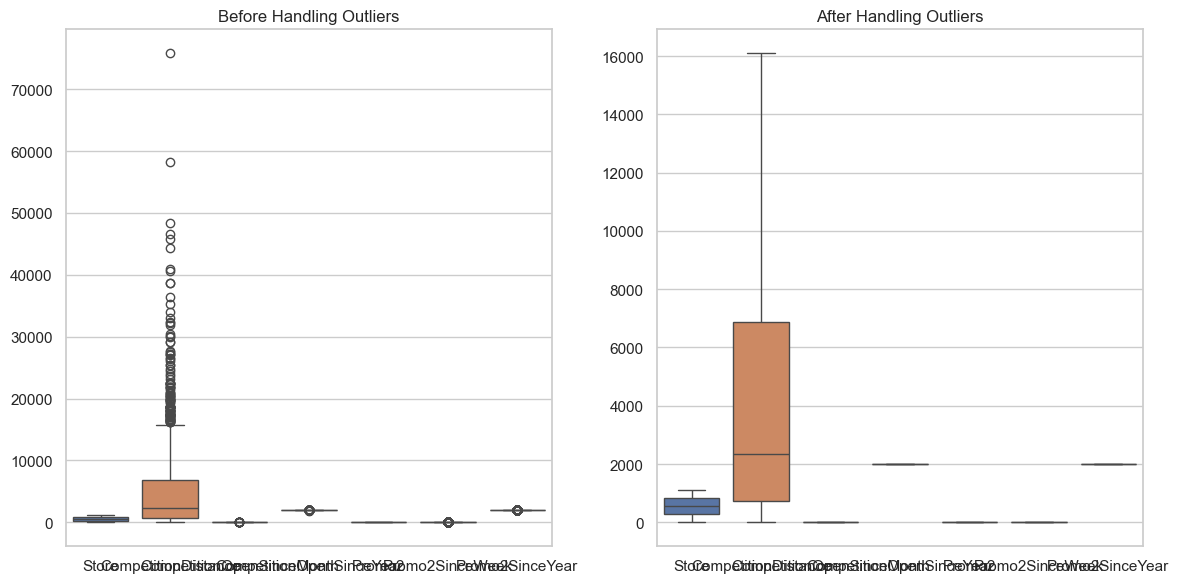

In [51]:
# Visualize the distribution before and after handling outliers
plt.figure(figsize=(12, 6))

# Before handling outliers
plt.subplot(1, 2, 1)
sns.boxplot(data=store)
plt.title('Before Handling Outliers')

# After handling outliers
plt.subplot(1, 2, 2)
sns.boxplot(data=df_cleaned)
plt.title('After Handling Outliers')

plt.tight_layout()
plt.show()

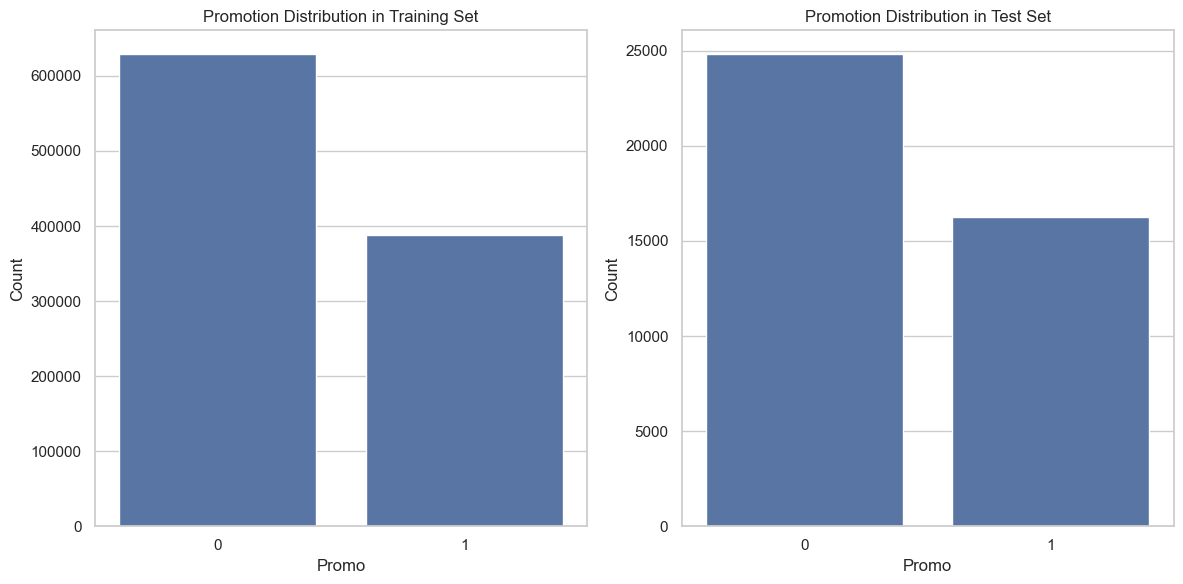

In [54]:
# Visualization of distribution of promotions
plt.figure(figsize=(12, 6))

# Count plot for training set
plt.subplot(1, 2, 1)
sns.countplot(data=train, x='Promo')
plt.title('Promotion Distribution in Training Set')
plt.xlabel('Promo')
plt.ylabel('Count')

# Count plot for test set
plt.subplot(1, 2, 2)
sns.countplot(data=test, x='Promo')
plt.title('Promotion Distribution in Test Set')
plt.xlabel('Promo')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [56]:

# Statistical test to compare distributions
train_counts = train['Promo'].value_counts()
test_counts = test['Promo'].value_counts()

# Create a contingency table
contingency_table = pd.DataFrame({
    'Train': train_counts,
    'Test': test_counts
}).fillna(0)

# Perform Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("\nChi-squared Test Result:")
print(f"Chi-squared Statistic: {chi2}")
print(f"P-value: {p}")


Chi-squared Test Result:
Chi-squared Statistic: 34.23585205719095
P-value: 4.882118480134891e-09


In [57]:

# Interpretation of the p-value
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis - distributions are significantly different.")
else:
    print("Fail to reject the null hypothesis - distributions are similar.")

Reject the null hypothesis - distributions are significantly different.


In [59]:
# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

In [60]:

# Define holiday periods
holidays = {
    'New Year': ('2023-01-01', '2023-01-02'),
    'Independence Day': ('2023-07-04', '2023-07-05'),
    'Christmas': ('2023-12-24', '2023-12-26'),
}

logger.info("Holiday dates defined.")

# Create a new column for holiday classification
logger.info("Classifying holiday status...")

2024-09-20 19:29:24,610 - INFO - Holiday dates defined.
2024-09-20 19:29:24,627 - INFO - Classifying holiday status...


In [62]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [68]:
def count_rows_columns(df, name):
    rows, columns = df.shape
    print(f"The {name} dataset has {rows} rows and {columns} columns.")
# Count rows and columns for each dataset
count_rows_columns(train, "train")
count_rows_columns(test, "test")
count_rows_columns(store, "store")

The train dataset has 1017209 rows and 9 columns.
The test dataset has 41088 rows and 8 columns.
The store dataset has 1115 rows and 10 columns.


In [69]:
def show_data_info(df, name):
    print(f"Information for {name} dataset:")
    df_info = df.info()
    print(df_info)
    print("\n")

In [70]:
# Show data info for each dataset
show_data_info(train, "train")

Information for train dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 69.8+ MB
None




In [71]:
def count_rows_columns(df, name):
    rows, columns = df.shape
    print(f"The {name} dataset has {rows} rows and {columns} columns.")
# Count rows and columns for each dataset
count_rows_columns(train, "train")
count_rows_columns(test, "test")
count_rows_columns(store, "store")

The train dataset has 1017209 rows and 9 columns.
The test dataset has 41088 rows and 8 columns.
The store dataset has 1115 rows and 10 columns.


###Analyze sales during holiday

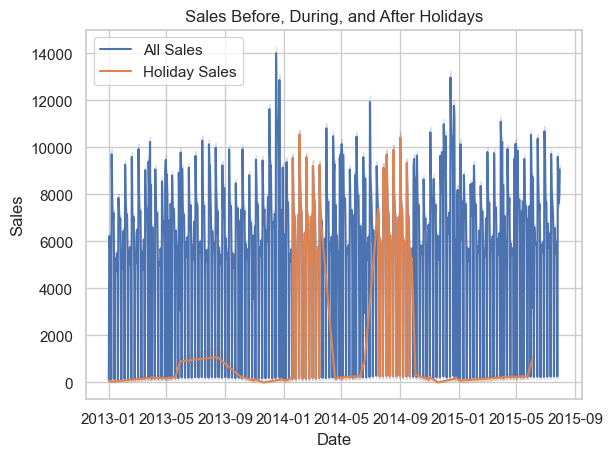

In [72]:
# Sales behavior before, during, and after holidays
def sales_during_holidays(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    holidays = df[df['StateHoliday'] != '0']
    sns.lineplot(data=df, x='Date', y='Sales', label='All Sales')
    sns.lineplot(data=holidays, x='Date', y='Sales', label='Holiday Sales')
    plt.title('Sales Before, During, and After Holidays')
    plt.show()


sales_during_holidays(train)

###Seasonal purchase behavior

2024-09-20 21:03:21,742 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-09-20 21:03:23,799 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


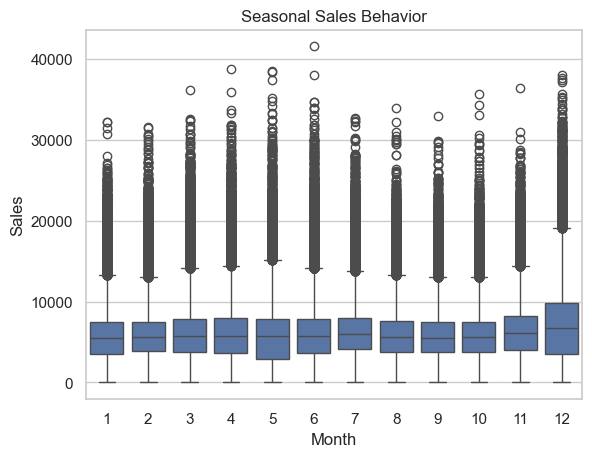

In [81]:
# Seasonal Purchase Behavior
def seasonal_sales_behavior(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Month'] = df['Date'].dt.month
    sns.boxplot(x='Month', y='Sales', data=df)
    plt.title('Seasonal Sales Behavior')
    plt.show()

# Analyze seasonal sales behavior
seasonal_sales_behavior(train)

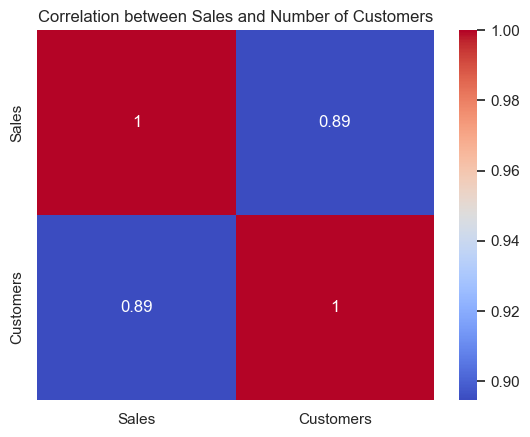

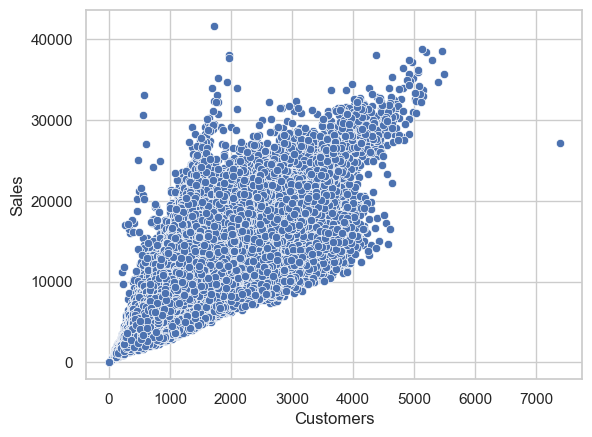

In [82]:
# Correlation Analysis
def correlation_analysis(df):
    correlation = df[['Sales', 'Customers']].corr()
    sns.heatmap(correlation, annot=True, cmap='coolwarm')
    plt.title('Correlation between Sales and Number of Customers')
    plt.show()
    sns.scatterplot(x=df['Customers'],y=df['Sales'])

# Perform correlation analysis
correlation_analysis(train)

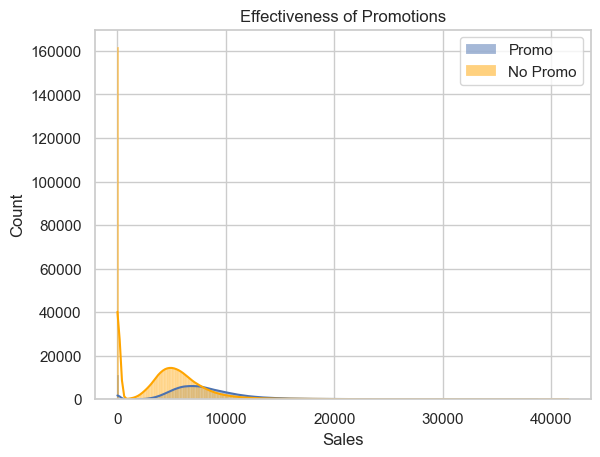

In [83]:
# Promo Effectiveness
def promo_effectiveness(df):
    promo_sales = df[df['Promo'] == 1]['Sales']
    no_promo_sales = df[df['Promo'] == 0]['Sales']
    sns.histplot(promo_sales, kde=True, label='Promo')
    sns.histplot(no_promo_sales, kde=True, color='orange', label='No Promo')
    plt.legend()
    plt.title('Effectiveness of Promotions')
    plt.show()

# Analyze promo effectiveness
promo_effectiveness(train)

2024-09-20 21:05:37,971 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-09-20 21:05:39,254 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


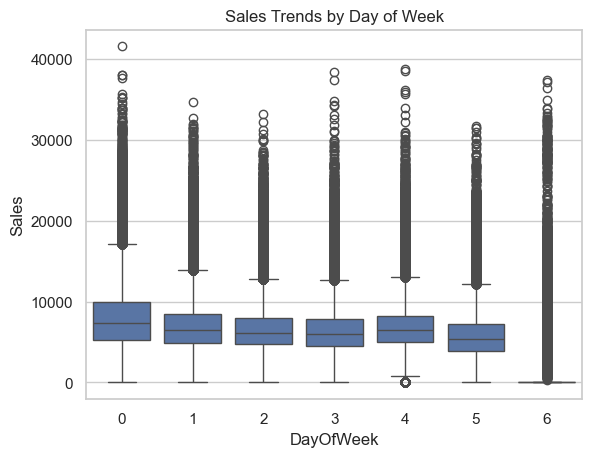

In [84]:
# Operational Trends
def operational_trends(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['DayOfWeek'] = df['Date'].dt.dayofweek
    sns.boxplot(x='DayOfWeek', y='Sales', data=df)
    plt.title('Sales Trends by Day of Week')
    plt.show()

# Analyze operational trends
operational_trends(train)

In [86]:
train = pd.merge(train, store, on='Store')
test = pd.merge(test, store, on='Store')

# Display the first few rows of the merged training data
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Month,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,4,2015-07-31,5263,555,1,1,0,1,7,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,4,2015-07-31,6064,625,1,1,0,1,7,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,4,2015-07-31,8314,821,1,1,0,1,7,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,4,2015-07-31,13995,1498,1,1,0,1,7,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,4,2015-07-31,4822,559,1,1,0,1,7,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


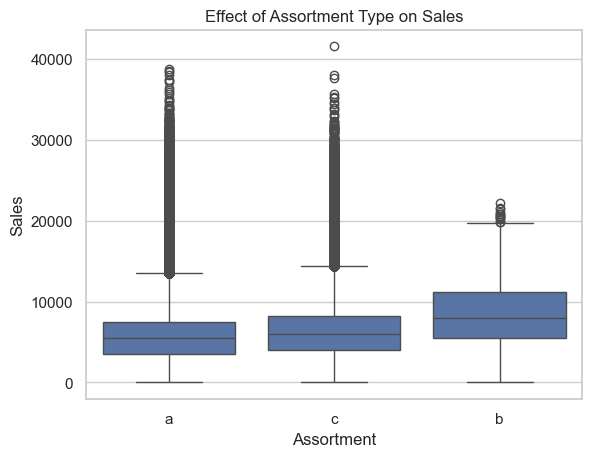

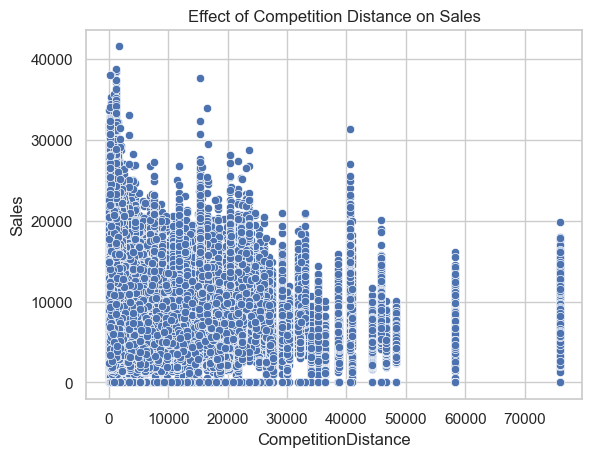

In [87]:
# Assortment and Competition Analysis
def assortment_effect(df):
    sns.boxplot(x='Assortment', y='Sales', data=df)
    plt.title('Effect of Assortment Type on Sales')
    plt.show()

def competition_effect(df):
    sns.scatterplot(x='CompetitionDistance', y='Sales', data=df)
    plt.title('Effect of Competition Distance on Sales')
    plt.show()

# Analyze assortment effect
assortment_effect(train)

# Analyze competition effect
competition_effect(train)

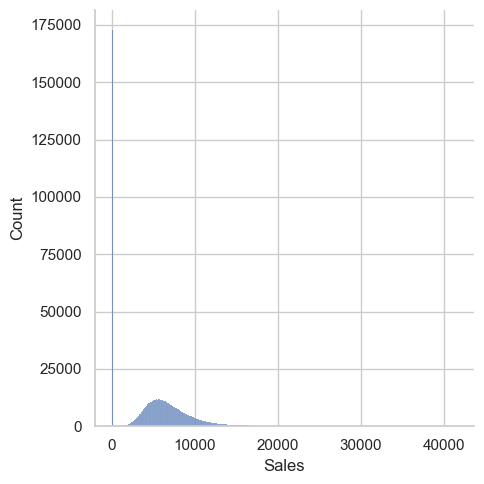

In [88]:
#distrubution of sales of the company
def distribution_of_sales(df):
    sns.displot(x=df['Sales'])
distribution_of_sales(train)

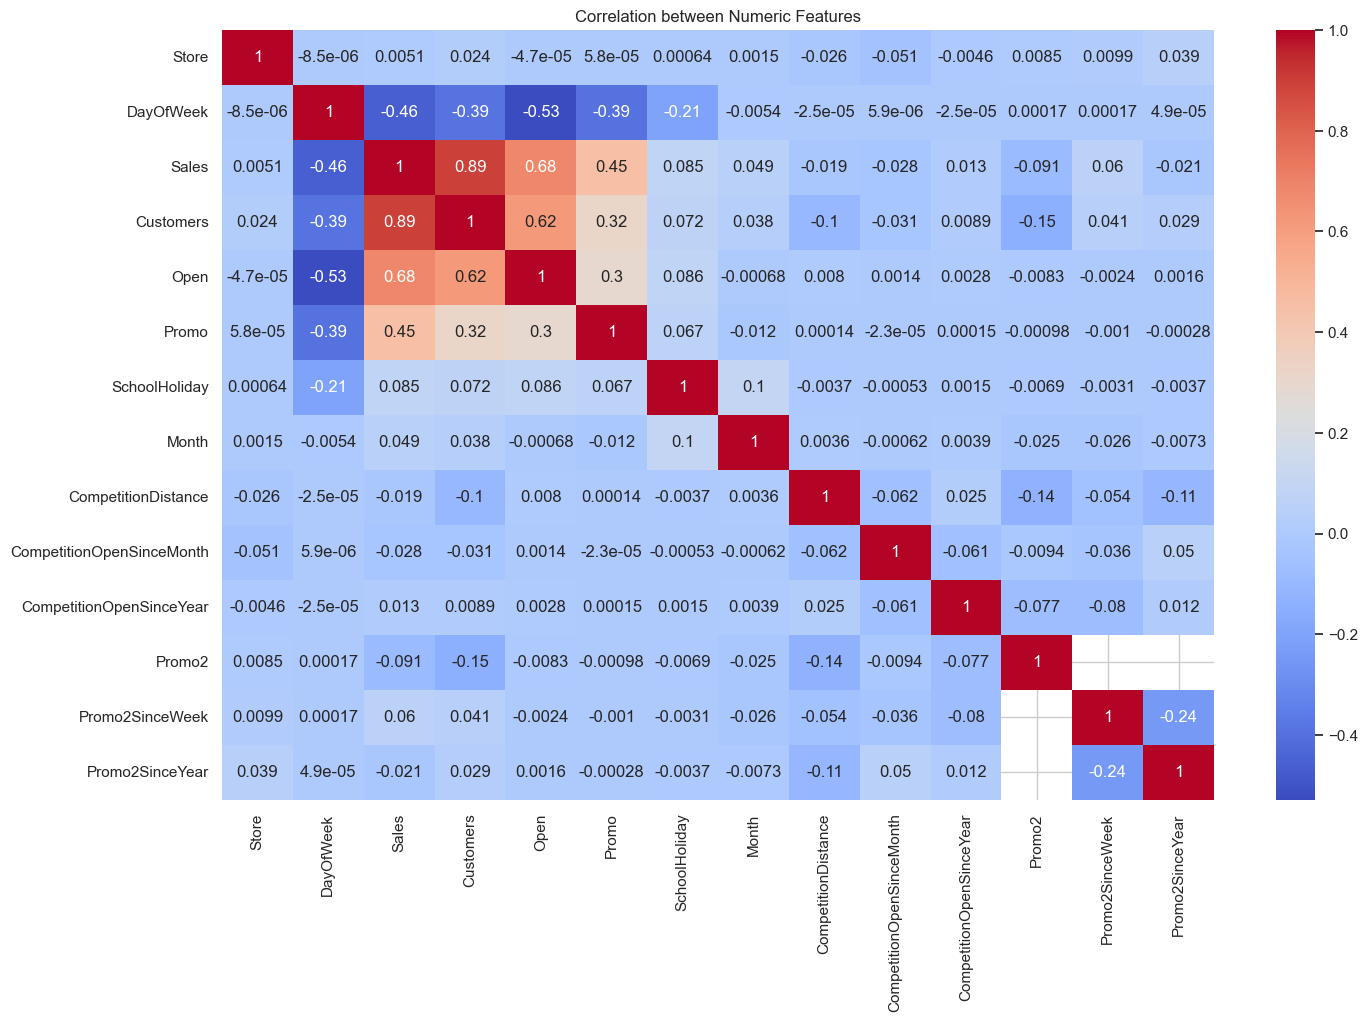

In [89]:
def correlation_analysis(df):
    # Select only numeric columns
    numeric_df = df.select_dtypes(include=[np.number])
    
    # Calculate the correlation matrix
    correlation_matrix = numeric_df.corr()
    
    # Plot the heatmap
    plt.figure(figsize=(16,10))
    sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True)
    plt.title('Correlation between Numeric Features')
    plt.show()

# Apply the function to the training data
correlation_analysis(train)